In [59]:
import json
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open('matriz_de_adjacência.json', 'r') as file:
    matriz = json.load(file)
matriz

[[0, 20, 0, 0, 0, 0, 0, 29, 0, 0, 0, 29, 37, 0, 0, 0, 0, 0],
 [20, 0, 25, 0, 0, 0, 0, 28, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0],
 [0, 25, 0, 25, 0, 0, 0, 30, 0, 0, 0, 29, 54, 0, 0, 0, 0, 0],
 [0, 0, 25, 0, 39, 32, 42, 0, 23, 33, 0, 0, 0, 56, 0, 0, 0, 0],
 [0, 0, 0, 39, 0, 12, 26, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 32, 12, 0, 17, 0, 0, 35, 30, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 42, 26, 17, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0],
 [29, 28, 30, 0, 0, 0, 0, 0, 0, 0, 0, 25, 22, 0, 0, 0, 0, 0],
 [0, 0, 0, 23, 0, 0, 0, 0, 0, 26, 0, 0, 34, 0, 0, 43, 0, 0],
 [0, 0, 0, 33, 19, 0, 0, 0, 26, 0, 24, 0, 0, 30, 19, 0, 0, 0],
 [0, 0, 0, 0, 0, 30, 38, 0, 0, 10, 0, 0, 0, 0, 26, 0, 0, 36],
 [29, 39, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 27, 0, 0, 43, 0, 0],
 [37, 0, 54, 0, 0, 0, 0, 22, 34, 0, 0, 27, 0, 24, 0, 19, 0, 0],
 [0, 0, 0, 56, 0, 0, 0, 0, 0, 30, 0, 0, 24, 0, 20, 19, 17, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 26, 0, 0, 20, 0, 0, 18, 21],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 19, 19, 0, 0, 26, 0],
 [0, 0, 

In [3]:
# nós
n_cidades = len(matriz)
n_cidades

18

In [4]:
# Algoritmo de Floyd-Warshall para criar grafo completo
def floyd_warshall(matriz):
    n = len(matriz)
    dist = [[float('inf')] * n for _ in range(n)]
    for i in range(n):
        dist[i][i] = 0
        for j in range(n):
            if matriz[i][j] != 0:
                dist[i][j] = matriz[i][j]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

In [5]:
# Aplicar Floyd-Warshall à matriz
matriz_completa = floyd_warshall(matriz)
matriz_completa

[[0, 20, 45, 70, 109, 102, 112, 29, 71, 91, 107, 29, 37, 61, 81, 56, 78, 93],
 [20, 0, 25, 50, 89, 82, 92, 28, 73, 83, 107, 39, 50, 74, 94, 69, 91, 106],
 [45, 25, 0, 25, 64, 57, 67, 30, 48, 58, 82, 29, 52, 76, 77, 71, 93, 98],
 [70, 50, 25, 0, 39, 32, 42, 55, 23, 33, 57, 54, 57, 56, 52, 66, 70, 73],
 [109, 89, 64, 39, 0, 12, 26, 94, 45, 19, 42, 93, 73, 49, 38, 68, 56, 59],
 [102, 82, 57, 32, 12, 0, 17, 87, 55, 31, 30, 86, 85, 61, 50, 80, 68, 66],
 [112, 92, 67, 42, 26, 17, 0, 97, 65, 45, 38, 96, 99, 75, 64, 94, 82, 74],
 [29, 28, 30, 55, 94, 87, 97, 0, 56, 76, 92, 25, 22, 46, 66, 41, 63, 78],
 [71, 73, 48, 23, 45, 55, 65, 56, 0, 26, 50, 61, 34, 56, 45, 43, 63, 66],
 [91, 83, 58, 33, 19, 31, 45, 76, 26, 0, 24, 81, 54, 30, 19, 49, 37, 40],
 [101, 93, 68, 43, 29, 30, 38, 86, 36, 10, 0, 91, 64, 40, 26, 59, 44, 36],
 [29, 39, 55, 80, 100, 112, 122, 25, 61, 81, 97, 0, 27, 51, 71, 43, 68, 83],
 [37, 50, 52, 57, 73, 85, 99, 22, 34, 54, 70, 27, 0, 24, 44, 19, 41, 56],
 [61, 74, 76, 56, 49, 61,

In [6]:
# Função para calcular a distância total de uma rota
def calcular_distancia(rota, matriz):
    distancia = 0
    for i in range(len(rota) - 1):
        if matriz[rota[i]][rota[i + 1]] == float('inf'):
            return float('inf')  # Caso raro, se Floyd-Warshall falhar
        distancia += matriz[rota[i]][rota[i + 1]]
    # Adicionar retorno ao ponto inicial (nó 1, índice 0)
    if matriz[rota[-1]][rota[0]] == float('inf'):
        return float('inf')
    distancia += matriz[rota[-1]][rota[0]]
    return distancia

In [7]:
# Gerar uma rota inicial (permutação começando e terminando no nó 1)
def gerar_rota_inicial():
    cidades = list(range(1, n_cidades))  # Cidades 1 a 17 (índices 1 a 17)
    random.shuffle(cidades)
    return [0] + cidades  # Começa com nó 1 (índice 0)

In [8]:
# Função de fitness (inverso da distância)
def fitness(rota, matriz):
    distancia = calcular_distancia(rota, matriz)
    return 1 / distancia if distancia != float('inf') else 0

In [9]:
# Seleção por torneio
def selecao_torneio(populacao, matriz, k=3):
    selecionados = random.sample(populacao, k)
    return max(selecionados, key=lambda rota: fitness(rota, matriz))

In [10]:
# Crossover ordenado
def crossover(pai1, pai2):
    tamanho = len(pai1)
    filho = [None] * tamanho
    filho[0] = 0  # Garante que começa no nó 1 (índice 0)
    
    # Escolher um segmento do pai1 (excluindo o nó inicial)
    start, end = sorted(random.sample(range(1, tamanho), 2))
    filho[start:end] = pai1[start:end]
    
    # Preencher com cidades do pai2, na ordem, evitando duplicatas
    cidades_restantes = [c for c in pai2[1:] if c not in filho[start:end]]
    pos = 1
    for cidade in cidades_restantes:
        while pos < tamanho and filho[pos] is not None:
            pos += 1
        if pos < tamanho:
            filho[pos] = cidade
    
    # Verificar se há None (indicaria erro)
    if None in filho:
        return gerar_rota_inicial()
    
    return filho

In [74]:
# Mutação (troca de duas cidades, exceto nó 1)
def mutacao_swap(rota, prob_mutacao=0.1):
    if random.random() < prob_mutacao:
        i, j = random.sample(range(1, len(rota)), 2)  # Não troca nó 1
        rota[i], rota[j] = rota[j], rota[i]
    return rota

In [75]:
def mutacao_inversao(rota, prob_mutacao=0.1):
    if random.random() < prob_mutacao:
        tamanho = len(rota)
        # Escolher dois índices aleatórios (exceto o primeiro, que é 0)
        start, end = sorted(random.sample(range(1, tamanho), 2))
        # Inverter o segmento entre start e end
        rota[start:end + 1] = rota[start:end + 1][::-1]
    return rota

In [81]:
# Algoritmo Genético
def algoritmo_genetico(matriz, tam_pop=100, geracoes=500, prob_mutacao=0.1,tipo_mutacao = 0):
    populacao = [gerar_rota_inicial() for _ in range(tam_pop)]
    melhor_distancia = float('inf')
    melhor_rota = None
    historico = []

    for geracao in range(geracoes):
        nova_populacao = []
        for _ in range(tam_pop):
            pai1 = selecao_torneio(populacao, matriz)
            pai2 = selecao_torneio(populacao, matriz)
            rodadas = 0
            while pai1 == pai2 and rodadas<5:
                pai2 = selecao_torneio(populacao, matriz)
                rodadas +=1
            filho = crossover(pai1, pai2)
            if tipo_mutacao == 0:
                filho = mutacao_swap(filho, prob_mutacao)
            else:
                filho = mutacao_inversao(filho, prob_mutacao)
            nova_populacao.append(filho)

        populacao = nova_populacao
        for rota in populacao:
            dist = calcular_distancia(rota, matriz)
            if dist < melhor_distancia:
                melhor_distancia = dist
                melhor_rota = rota.copy()
        historico.append(melhor_distancia)
        # if len(historico) == 1:
        #     print(f"Geração {geracao+1}: Melhor distância = {melhor_distancia}")

        # if len(historico)>= 2 and historico[-1] < historico[-2]:
        #     print(f"Geração {geracao} = {historico[-2]}, Geração {geracao+1}: Melhor distância = {melhor_distancia}")

    return melhor_rota, melhor_distancia, historico

In [ ]:
# Executar o algoritmo com a matriz completa
melhor_rota, melhor_distancia, historico = algoritmo_genetico(matriz_completa)

In [ ]:
# Executar o algoritmo com a matriz completa
melhor_rota, melhor_distancia, historico = algoritmo_genetico(matriz_completa,tipo_mutacao=1)

In [82]:
score_swap = 0
score_inversao = 0
score_empate = 0
for i in range(50):
    print(i)
    # Executar o algoritmo com a matriz completa
    melhor_rota, melhor_distancia_swap, historico = algoritmo_genetico(matriz_completa)
    melhor_rota, melhor_distancia_inversao, historico = algoritmo_genetico(matriz_completa,tipo_mutacao=1)
    if melhor_distancia_swap < melhor_distancia_inversao:
        score_swap += 1
    elif melhor_distancia_swap > melhor_distancia_inversao:
        score_inversao += 1
    else:
        score_empate += 1
    print('-------------------------------------------\n')

print(f'Score swap: {score_swap}')
print(f'Score inversao: {score_inversao}')
print(f'Score empate: {score_empate}')

0
-------------------------------------------

1
-------------------------------------------

2
-------------------------------------------

3
-------------------------------------------

4
-------------------------------------------

5
-------------------------------------------

6
-------------------------------------------

7
-------------------------------------------

8
-------------------------------------------

9
-------------------------------------------

10
-------------------------------------------

11
-------------------------------------------

12
-------------------------------------------

13
-------------------------------------------

14
-------------------------------------------

15
-------------------------------------------

16
-------------------------------------------

17
-------------------------------------------

18
-------------------------------------------

19
-------------------------------------------

20
-------------------------------------------

21

In [16]:
# Exibir resultados
print(f"Melhor rota: {[x+1 for x in melhor_rota]}")  # Ajustar índices para 1-based
print(f"Distância total: {melhor_distancia}")

Melhor rota: [1, 2, 8, 12, 13, 9, 16, 14, 17, 18, 15, 11, 7, 6, 5, 10, 4, 3]
Distância total: 464


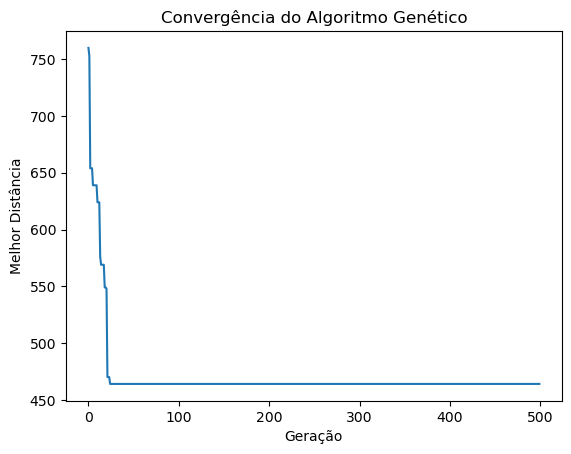

In [17]:
# Visualizar convergência
plt.plot(historico)
plt.xlabel('Geração')
plt.ylabel('Melhor Distância')
plt.title('Convergência do Algoritmo Genético')
plt.show()

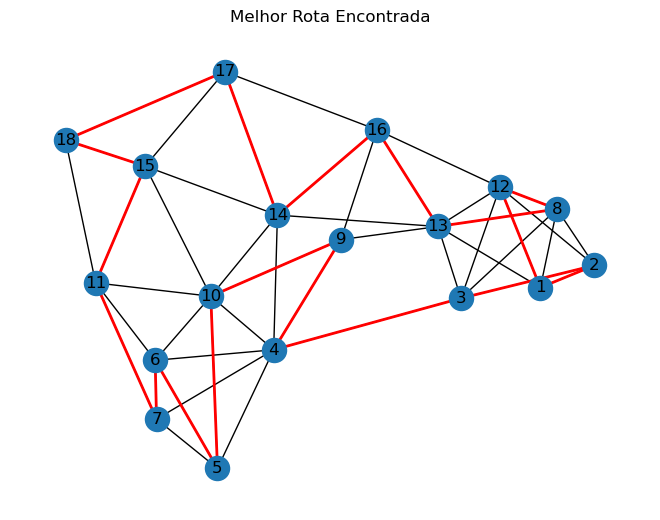

In [49]:
# Visualizar o grafo com a melhor rota
G = nx.Graph()
for i in range(n_cidades):
    for j in range(i + 1, n_cidades):
        if matriz[i][j] != 0:  # Usar matriz original para visualização
            G.add_edge(i + 1, j + 1, weight=matriz[i][j])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edges = [(melhor_rota[i] + 1, melhor_rota[i + 1] + 1) for i in range(len(melhor_rota) - 1)] + [(melhor_rota[-1] + 1, melhor_rota[0] + 1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
plt.title('Melhor Rota Encontrada')
plt.show()